# Máquinas Vectoriales de Soporte (SVM)

### 2. Transformación de los datos para SVM

In [3]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar datos procesados
df = pd.read_csv("../data/train_preprocessed.csv")

# Crear la variable categórica de precios
def categorizar_precio(valor):
    if valor < 150000:
        return 'barata'
    elif valor < 300000:
        return 'media'
    else:
        return 'cara'

df['PrecioCategoria'] = df['SalePrice'].apply(categorizar_precio)

# Eliminar SalePrice para clasificación
df_clasificacion = df.drop(columns=['SalePrice'])

# Separar variables predictoras (X) y target (y)
X = df_clasificacion.drop(columns=['PrecioCategoria'])
y = df_clasificacion['PrecioCategoria']

# Codificar variables categóricas si las hay
X = pd.get_dummies(X)

# Estandarizar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo (barata, media, cara → 0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir en entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


print(X.shape)
print(pd.Series(y_encoded).value_counts())


(1460, 287)
2    730
0    615
1    115
Name: count, dtype: int64


### 3. Entrenar modelos SVM

In [4]:
# Importar modelo de clasificación SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Modelo SVM con kernel lineal
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

# Modelo SVM con kernel RBF (radial)
svc_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

# Modelo SVM con kernel polinomial (grado 3)
svc_poly = SVC(kernel='poly', degree=3, C=1)
svc_poly.fit(X_train, y_train)
y_pred_poly = svc_poly.predict(X_test)

# Mostrar resultados
print("SVM Lineal:\n", classification_report(y_test, y_pred_linear, target_names=label_encoder.classes_))
print("SVM RBF:\n", classification_report(y_test, y_pred_rbf, target_names=label_encoder.classes_))
print("SVM Polinomial:\n", classification_report(y_test, y_pred_poly, target_names=label_encoder.classes_))


SVM Lineal:
               precision    recall  f1-score   support

      barata       0.89      0.88      0.89       139
        cara       0.69      0.75      0.72        24
       media       0.83      0.82      0.82       129

    accuracy                           0.85       292
   macro avg       0.80      0.82      0.81       292
weighted avg       0.85      0.85      0.85       292

SVM RBF:
               precision    recall  f1-score   support

      barata       0.90      0.93      0.91       139
        cara       0.81      0.54      0.65        24
       media       0.84      0.87      0.85       129

    accuracy                           0.87       292
   macro avg       0.85      0.78      0.81       292
weighted avg       0.87      0.87      0.87       292

SVM Polinomial:
               precision    recall  f1-score   support

      barata       0.98      0.34      0.50       139
        cara       0.91      0.42      0.57        24
       media       0.55      0.98  

### 4. Tuneo automático de hiperparámetros

In [5]:
from sklearn.model_selection import GridSearchCV

# RBF Kernel
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_rbf.fit(X_train, y_train)
print("Mejores parámetros (RBF):", grid_rbf.best_params_)
print("Mejor score (RBF):", grid_rbf.best_score_)

# Polinomial Kernel
param_grid_poly = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'degree': [2, 3, 4],
    'kernel': ['poly']
}
grid_poly = GridSearchCV(SVC(), param_grid_poly, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_poly.fit(X_train, y_train)
print("Mejores parámetros (Poly):", grid_poly.best_params_)
print("Mejor score (Poly):", grid_poly.best_score_)

# Lineal Kernel
param_grid_linear = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}
grid_linear = GridSearchCV(SVC(), param_grid_linear, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_linear.fit(X_train, y_train)
print("Mejores parámetros (Linear):", grid_linear.best_params_)
print("Mejor score (Linear):", grid_linear.best_score_)


Mejores parámetros (RBF): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor score (RBF): 0.8569205887312872
Mejores parámetros (Poly): {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
Mejor score (Poly): 0.840412028970395
Mejores parámetros (Linear): {'C': 0.1, 'kernel': 'linear'}
Mejor score (Linear): 0.8573363130276561


### 5. Usar los modelos para predecir la variable respuesta

Mejor modelo LINEAL
              precision    recall  f1-score   support

      barata       0.93      0.89      0.91       139
        cara       0.73      0.79      0.76        24
       media       0.85      0.87      0.86       129

    accuracy                           0.87       292
   macro avg       0.83      0.85      0.84       292
weighted avg       0.88      0.87      0.87       292



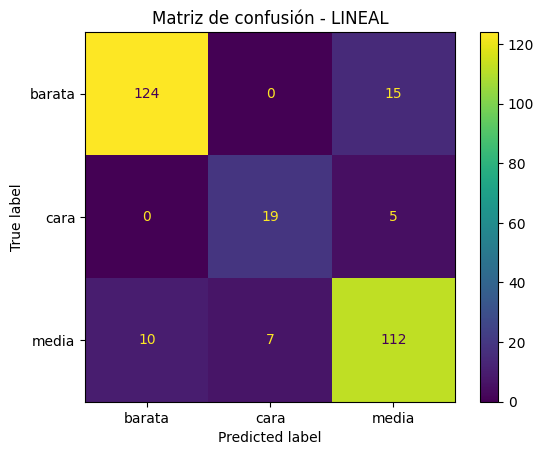

Mejor modelo RBF
              precision    recall  f1-score   support

      barata       0.91      0.92      0.92       139
        cara       0.72      0.75      0.73        24
       media       0.87      0.85      0.86       129

    accuracy                           0.88       292
   macro avg       0.83      0.84      0.84       292
weighted avg       0.88      0.88      0.88       292



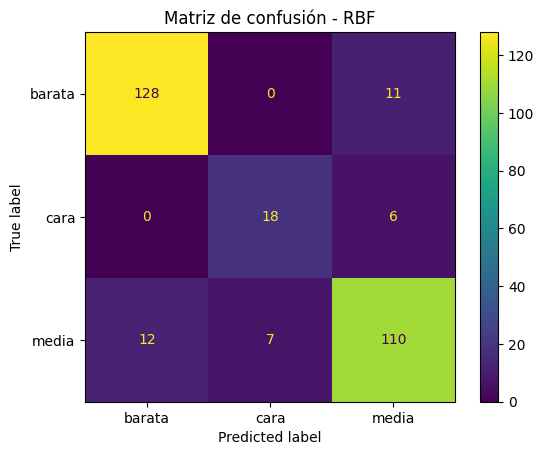

Mejor modelo POLINOMIAL
              precision    recall  f1-score   support

      barata       0.89      0.88      0.88       139
        cara       0.84      0.67      0.74        24
       media       0.82      0.86      0.84       129

    accuracy                           0.85       292
   macro avg       0.85      0.80      0.82       292
weighted avg       0.85      0.85      0.85       292



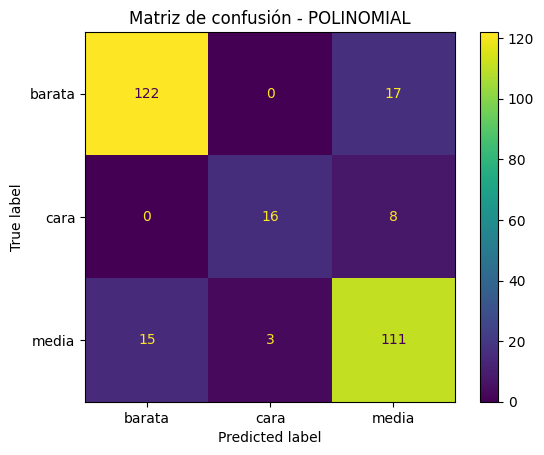

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluar modelo lineal
best_linear = grid_linear.best_estimator_
y_pred_linear = best_linear.predict(X_test)
print("Mejor modelo LINEAL")
print(classification_report(y_test, y_pred_linear, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_linear, display_labels=label_encoder.classes_)
plt.title("Matriz de confusión - LINEAL")
plt.show()

# Evaluar modelo RBF
best_rbf = grid_rbf.best_estimator_
y_pred_rbf = best_rbf.predict(X_test)
print("Mejor modelo RBF")
print(classification_report(y_test, y_pred_rbf, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rbf, display_labels=label_encoder.classes_)
plt.title("Matriz de confusión - RBF")
plt.show()

# Evaluar modelo POLINOMIAL
best_poly = grid_poly.best_estimator_
y_pred_poly = best_poly.predict(X_test)
print("Mejor modelo POLINOMIAL")
print(classification_report(y_test, y_pred_poly, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_poly, display_labels=label_encoder.classes_)
plt.title("Matriz de confusión - POLINOMIAL")
plt.show()
